# Fraud Detection

### In this mini project I wanted to use Logistic Regression :)

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

import shap

   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
   -- ------------------------------------- 30.7/455.5 kB ? eta -:--:--
   -- ------------------------------------- 30.7/455.5 kB ? eta -:--:--
   ------- ------------------------------- 92.2/455.5 kB 751.6 kB/s eta 0:00:01
   ------- ------------------------------- 92.2/455.5 kB 751.6 kB/s eta 0:00:01
   ----------------- -------------------- 204.8/455.5 kB 958.4 kB/s eta 0:00:01
   ----------------- -------------------- 204.8/455.5 kB 958.4 kB/s eta 0:00:01
   ------------------------- ------------ 307.2/455.5 kB 948.8 kB/s eta 0:00:01
   ------------------------- ------------ 307.2/455.5 kB 948.8 kB/s eta 0:00:01
   ---------------------------------------  450.6/455.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 455.5/455.5 kB 1.1 MB/s eta 0:00:00


c:\Programowanie\.vscode\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the data
df = pd.read_csv("C:/Programowanie/codecademy_projects/data_sets_codecademy/fraud_detection.csv")
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:

df['isPayment'] = df['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)
print(df['isPayment'].value_counts())



isPayment
0    4169693
1    2192927
Name: count, dtype: int64


In [5]:
# Create isMovement field
df['isMovement'] = df['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)
print(df['isMovement'].value_counts())

isMovement
0    3592211
1    2770409
Name: count, dtype: int64


In [7]:
X = df[['amount', 'isPayment', 'isMovement', 'accountDiff', 'transactionRatio', 'oldbalanceOrg', 'newbalanceOrig']]
y = df['isFraud']

In [8]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isPayment,isMovement,accountDiff,transactionRatio
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,170136.0,0.057834
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,21249.0,0.087731
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1,181.0,0.994505
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,21001.0,0.994505
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,41554.0,0.280788


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

### EDA

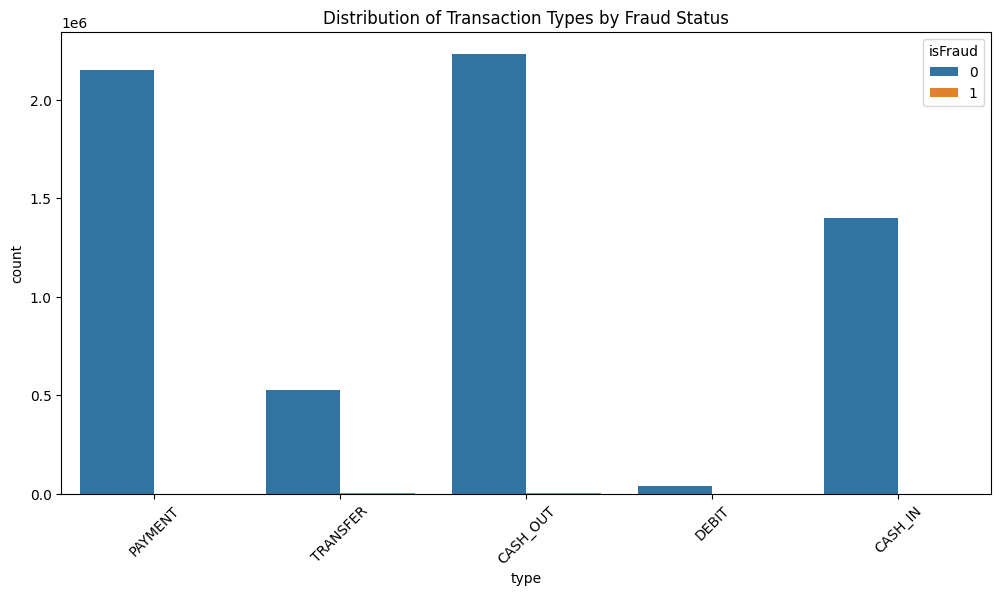

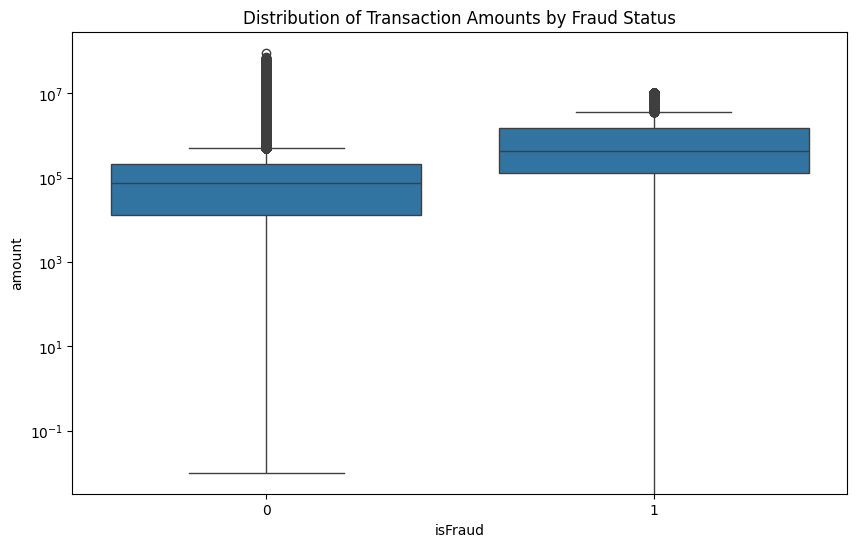

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Distribution of Transaction Types by Fraud Status')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.yscale('log')
plt.show()

In [14]:
## Handle Class Imbalance

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

## Model Training and Hyperparameter Tuning

In [15]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, 
                               n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train_resampled, y_train_resampled)

KeyboardInterrupt: 

In [ ]:
# XGBoost
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, 
                                n_iter=10, cv=3, random_state=42, n_jobs=-1)
xgb_random.fit(X_train_resampled, y_train_resampled)

In [ ]:
## Model Evaluation

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

print("Random Forest Evaluation:")
evaluate_model(rf_random.best_estimator_, X_test_scaled, y_test)

print("XGBoost Evaluation:")
evaluate_model(xgb_random.best_estimator_, X_test_scaled, y_test)


In [ ]:
## Feature Importance

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_random.best_estimator_, X.columns)
plot_feature_importance(xgb_random.best_estimator_, X.columns)

In [ ]:
## SHAP Values for Model Interpretability

explainer = shap.TreeExplainer(xgb_random.best_estimator_)
shap_values = explainer.shap_values(X_test_scaled)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X.columns)
plt.show()

In [ ]:
## Predict on New Transactions

new_transactions = np.array([
    [123456.78, 0, 1, 54670.1, 0.5, 100000, 80000],
    [98765.43, 1, 0, 8524.75, 0.2, 500000, 400000],
    [543678.31, 1, 0, 510025.5, 0.8, 600000, 50000],
    [927582.31, 1, 0, 10510025.5, 0.9, 1000000, 70000]
])

new_transactions_scaled = scaler.transform(new_transactions)

rf_predictions = rf_random.best_estimator_.predict(new_transactions_scaled)
xgb_predictions = xgb_random.best_estimator_.predict(new_transactions_scaled)

for i, (rf_pred, xgb_pred) in enumerate(zip(rf_predictions, xgb_predictions)):
    print(f"Transaction {i+1}:")
    print(f"  Random Forest Prediction: {'Fraud' if rf_pred == 1 else 'Not Fraud'}")
    print(f"  XGBoost Prediction: {'Fraud' if xgb_pred == 1 else 'Not Fraud'}")
    print()

In [ ]:
# Fit the model to the training data
model = LogisticRegression()
model.fit(x_train, y_train)


# Score the model on the training data
print(model.score(x_train, y_train))

# Score the model on the test data
print(model.score(x_test, y_test))

# Print the model coefficients
print(model.coef_)

0.9986818098743689
0.9987002209781505
[[ 4.45584262e-07 -5.26042439e+00 -3.87308208e-01 -2.16945919e-07]]


In [ ]:
# New transaction data
random_transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
random_transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
random_transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])
random_transaction4 = np.array([927582758273851543678.31, 1.0, 0.0, 10510025.5])


# Combine new transactions into a single array
sample_transactions = np.stack((random_transaction1, random_transaction2, random_transaction3, random_transaction4))

# Normalize the new transactions
sample_transactions = s.transform(sample_transactions)

# Predict fraud on the new transactions
print(model.predict(sample_transactions))

# Show probabilities on the new transactions
print(model.predict_proba(sample_transactions))

[0 0 0 1]
[[9.20409950e-01 7.95900499e-02]
 [9.99997057e-01 2.94347343e-06]
 [9.99997057e-01 2.94347432e-06]
 [0.00000000e+00 1.00000000e+00]]


c:\Programowanie\.vscode\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Programowanie\.vscode\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Programowanie\.vscode\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
